## 1.  Loading the Pre-processed Dataset <a name="resume"></a>

We will reuse the code for data preprocessing developed in previous practicals.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from dm_tools import data_prep

# set the random seed - consistent
rs = 10

# load the data
df,X,y,X_train, X_test, y_train, y_test = data_prep()

C:\Users\JohnMarquess\OneDrive - John Marquess\Projects\IFN509\Tutorials\Week11\dm_tools.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DemAge'].fillna(df['DemAge'].mean(), inplace=True)
C:\Users\JohnMarquess\OneDrive - John Marquess\Projects\IFN509\Tutorials\Week11\dm_tools.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

## 2. Building the first logistic regression model <a name="build"></a>

### 2.1. Standardisation

Most machine learning/data mining algorithms, including regression models, are
sensitive to input variables on different scales. Input variables on different
scales make comparison between data points difficult. For 
example, consider two variables with different scaled values: student grade (in the
range of 1-4) and student age (\~20-65)). In addition, it also adversely affects **gradient descent** (an algorithm used for training models such as regressions, neural networks, Support Vector Machines, etc) by making weights on larger scale inputs to update much faster than smaller scale inputs, resulting in a suboptimal model performance.

> To read more about feature scaling, read this excellent blog post from Sebastian Raschka [link](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html)

To avoid this problem, it is necessary to perform standardisation on input variables.

In [4]:
df

,TargetB,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,GiftTimeLast,...,DemCluster_51,DemCluster_52,DemCluster_53,DemCluster_6,DemCluster_7,DemCluster_8,DemCluster_9,DemGender_F,DemGender_M,DemGender_U
0,0,2,4,1,3,17.0,13.50,9.25,17.000000,21,...,False,False,False,False,False,False,False,True,False,False
1,0,1,8,0,3,20.0,20.00,15.88,14.224431,26,...,False,False,False,False,False,False,False,True,False,False
2,1,6,41,3,20,6.0,5.17,3.73,5.000000,18,...,False,False,False,False,False,False,False,False,True,False
3,1,3,12,3,8,10.0,8.67,8.50,8.670000,9,...,False,False,False,False,False,False,False,False,True,False
4,0,1,1,1,1,20.0,20.00,20.00,20.000000,21,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9681,1,2,2,2,2,10.0,15.00,15.00,15.000000,17,...,False,False,False,False,False,False,False,False,True,False
9682,0,3,4,1,1,10.0,13.33,11.50,10.000000,25,...,False,False,False,False,False,False,False,False,False,True
9683,1,9,14,5,7,10.0,8.78,7.71,8.800000,15,...,False,False,False,False,False,False,False,True,False,False
9684,0,2,7,0,1,5.0,12.50,7.43,14.224431,6,...,False,False,False,False,False,False,False,False,True,False


In [3]:
from sklearn.preprocessing import StandardScaler

# initialise a standard scaler object
scaler = StandardScaler()

# visualise min, max, mean and standard dev of data before scaling
print("Before scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# learn the mean and std.dev of variables from training data
# then use the learned values to transform training data
X_train = scaler.fit_transform(X_train, y_train)

print("After scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# use the statistic that you learned from training to transform test data
# NEVER learn from test data, this is supposed to be a set of dataset
# that the model has never seen before
X_test = scaler.transform(X_test)

Before scaling
-------------
Variable #0: min 0, max 13, mean 3.20 and std dev 2.13
Variable #1: min 1, max 89, mean 10.50 and std dev 8.95
Variable #2: min 0, max 9, mean 1.86 and std dev 1.59
Variable #3: min 0, max 41, mean 5.58 and std dev 4.73
Variable #4: min 0.0, max 450.0, mean 15.97 and std dev 12.07
After scaling
-------------
Variable #0: min -1.505311488472091, max 4.600729037733905, mean -0.00 and std dev 1.00
Variable #1: min -1.0623391496250907, max 8.7746107562059, mean -0.00 and std dev 1.00
Variable #2: min -1.1659811623481273, max 4.487429288703341, mean -0.00 and std dev 1.00
Variable #3: min -1.1795617205202689, max 7.485041166941727, mean -0.00 and std dev 1.00
Variable #4: min -1.3225650969557856, max 35.95505089608766, mean 0.00 and std dev 1.00


### 2.2. Training logistic regression

Once the input variables are scaled, we are ready to build the model. As
discussed before, the underlying problem is classification predictive mining,
therefore, a logistic regression model will be build for this classification
task. In sklearn, logistic regression is implemented in
`sklearn.linear_model.LogisticRegression`.

In [3]:
from sklearn.linear_model import LogisticRegression

Similar to decision tree, initiate a model object (with random state to ensure consistent result) and fit it to the training dataset. 

In [4]:
model = LogisticRegression(random_state=rs)

# fit it to training data
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
# training and test accuracy
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

# classification report on test data
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.5936578171091446
Test accuracy: 0.56194081211287
              precision    recall  f1-score   support

           0       0.56      0.57      0.57      1453
           1       0.56      0.55      0.56      1453

    accuracy                           0.56      2906
   macro avg       0.56      0.56      0.56      2906
weighted avg       0.56      0.56      0.56      2906



The model does not produce an acceptable accuracy score on training data. The training accuracy is slightly higher than the test accuracy which may indicate slight overfitting but that needs to be investigated. We will tune this logistic regression model later using GridSearchCV to imrprove the accuracy.

## 3. Understanding the logistic regression model <a name="viz"></a>
Once the model is trained, all of its weights are stored in `.coef_` array of the model.

In [6]:
print(model.coef_)

[[ 8.56479317e-02  5.74631371e-02  9.58946027e-02 -7.69919083e-02
  -5.02902331e-02 -3.99709024e-02  7.37732317e-02 -5.92560335e-02
  -1.68292677e-01  2.80519442e-01 -1.39754466e-01  5.05070065e-02
   1.97683503e-01  4.77612140e-02  9.50116479e-02 -4.38436665e-01
   1.10063136e-01  5.51064382e-02  2.69872103e-02  1.25814151e-01
   4.53440991e-02 -2.50488747e-02 -2.30633992e-02  7.76561114e-02
  -2.66603966e-02 -7.16675987e-03  2.82366134e-02  5.92501486e-05
   4.95165519e-02  2.50354442e-02 -5.18832419e-02  2.46946960e-02
   2.03374611e-03  4.35110123e-03 -1.70204184e-04 -1.34981177e-03
  -2.41930044e-02  1.54508038e-02  2.44619453e-02 -5.98428132e-04
   9.42231360e-03  1.79364746e-02 -3.78661229e-02 -1.01825582e-02
  -1.30017508e-02  1.83649892e-02 -7.88115883e-03  8.93770163e-04
  -3.88925245e-04  1.77522198e-02  1.19328388e-02  2.45900873e-02
  -5.11924297e-02  1.11579624e-02 -4.77995044e-02 -1.00049707e-02
  -3.03188210e-03  3.13878856e-02 -1.14417950e-03 -1.78740259e-02
   3.76321

Each of these values corresponds to a variable/feature in the dataset. We can print out the feature name associated with each coefficient with this code below.

In [7]:
feature_names = X.columns
coef = model.coef_[0]

# limit to 20 features, you can comment the following line to print out everything
coef = coef[:20]

for i in range(len(coef)):
    print(feature_names[i], ':', coef[i])

GiftCnt36 : 0.08564793174330508
GiftCntAll : 0.05746313707979046
GiftCntCard36 : 0.09589460268134936
GiftCntCardAll : -0.07699190828076483
GiftAvgLast : -0.05029023311749633
GiftAvg36 : -0.03997090240216672
GiftAvgAll : 0.07377323168569479
GiftAvgCard36 : -0.05925603345643192
GiftTimeLast : -0.16829267718061125
GiftTimeFirst : 0.28051944167333015
PromCnt12 : -0.13975446633584174
PromCnt36 : 0.05050700651424271
PromCntAll : 0.1976835033755152
PromCntCard12 : 0.04776121404026222
PromCntCard36 : 0.0950116479196176
PromCntCardAll : -0.4384366648540792
StatusCatStarAll : 0.11006313623278328
DemAge : 0.055106438177314344
DemHomeOwner : 0.026987210346360868
DemMedHomeValue : 0.1258141510220739


Recall again that a linear/logistic regression model assumes a linear correlation between input features and target values. This relationship is reflected in the weight values.
* Positive coefficient means positive change in the input feature has positive correlation to the prediction value. **DemAge** has positive coefficients, which means older donors (larger age value) are predicted to be more likely to donate back.

* Negative coefficient does the reverse. For example, **GiftTimeLast** has negative coefficient, thus if a donor has not donated for a while, the model predicts it is less likely for them to be a lapsing donor.

In addition to understanding positive/negative correlations between features and prediction values, it is important to learn how much a feature impacts the overall prediction value (i.e. feature importance). One way to answer this question is by looking at the absolute value of coefficients. Changes in an important variable (either positive or negative) should correlate to a larger impact to prediction value, thus the coefficient assigned to this variable will have a large absolute value. 

This method only applies when the features are standard scaled. Without scaling, each feature can be on different range of values, making the larger ranged feature more important by default. For example, in a dataset with **age** and **income**, a **+10** increase in age is significant, but it is meaningless in income. 

The following code will sort the coefficients by their largest absolute value and print the corresponding feature names.

In [8]:
# grab feature importances from the model and feature name from the original X
coef = model.coef_[0]
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', coef[i])

PromCntCardAll : -0.4384366648540792
GiftTimeFirst : 0.28051944167333015
PromCntAll : 0.1976835033755152
GiftTimeLast : -0.16829267718061125
PromCnt12 : -0.13975446633584174
DemMedHomeValue : 0.1258141510220739
StatusCatStarAll : 0.11006313623278328
GiftCntCard36 : 0.09589460268134936
PromCntCard36 : 0.0950116479196176
GiftCnt36 : 0.08564793174330508
StatusCat96NK_E : 0.07765611138128718
GiftCntCardAll : -0.07699190828076483
GiftAvgAll : 0.07377323168569479
GiftAvgCard36 : -0.05925603345643192
GiftCntAll : 0.05746313707979046
DemAge : 0.055106438177314344
DemCluster_47 : -0.05283912552726659
DemCluster_10 : -0.05188324186791754
DemCluster_30 : -0.051192429695869596
PromCnt36 : 0.05050700651424271


Based on this output, the top-3 important variables in this model are PromCntCardAll, GiftTimeFirst, and PromCntAll. The ordering of important variables may differ different between models.

## 4. Finding optimal hyperparameters with GridSearchCV <a name="gridsearch"></a>

This section will guide you to tune the default model to perform better. In this logistic regression model, we will only tune one hyperparameter,  the regularisation strength. Regularisation is a technique used to prevent overfitting in regression models. We will not go in depth to explain how regularisation works, you can find more information here:
* [Basic of regularisation](https://www.quora.com/What-is-regularization-in-machine-learning)
* [L1 vs L2 regularisation](http://www.chioka.in/differences-between-l1-and-l2-as-loss-function-and-regularization/)

In `sklearn` logistic regression, regularisation is implemented via the hyperparameter **C**, which denotes the inverse of regularisation strength. Smaller C means stronger regularisation. Typical values for C range from $10^{-6}$ to $10^{4}$, increasing in logarithmic order, which are the values we will use in this example.

**Tips:** `GridSearchCV` can be slow for searching over a large set of possible values. To speed up the searching process, `GridSearchCV` has parallel running capability, where you can specify how many parallel processes run concurrently with `n_jobs` (-1 means GridSearchCV will use as many cores as possible).

In [9]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=10, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [10]:
result_set = cv.cv_results_
print(result_set)

{'mean_fit_time': array([0.10142791, 0.07161188, 0.14961674, 0.16470158, 0.3754668 ,
       0.55314081, 0.83623943, 0.7572623 , 0.66558859, 0.53418951]), 'std_fit_time': array([0.04945515, 0.01910362, 0.03351158, 0.05139281, 0.13451814,
       0.14011479, 0.35983689, 0.25231347, 0.19691503, 0.09289368]), 'mean_score_time': array([0.00292583, 0.00299695, 0.00249174, 0.00279195, 0.00209129,
       0.00422626, 0.00276341, 0.00235765, 0.00257745, 0.00296035]), 'std_score_time': array([0.00205444, 0.00285807, 0.0014974 , 0.00203569, 0.00094485,
       0.0051413 , 0.0016275 , 0.00117242, 0.00150397, 0.00139077]), 'param_C': masked_array(data=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                   1000],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1e-06}, {'C': 1e-05}, {'C': 0.0001}, {'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C'

In Decision tree, there were three hyperparameters fine-tuned using GridSearchCV. In logistic regression, `C` is the only hyperparameter we will fine-tune. Therefore, the number of models built is equal to the range of values we define for the hyperparameter `C`. 

Let us plot the train and test score of split0. 

Total number of models:  10


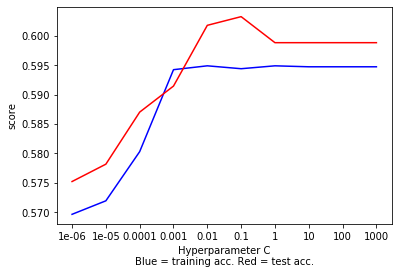

In [11]:
import matplotlib.pyplot as plt
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

From the figure above, the optimal value for `C` is 0.1. However this will not be the final choice as we have 9 more splits to consider. Now, let us plot the mean train and test score for all the splits.

Total number of models:  10


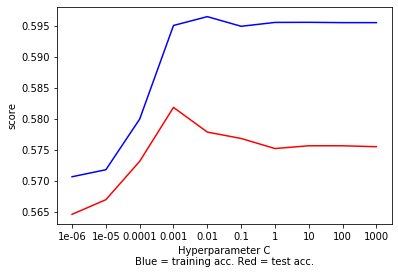

In [12]:
import matplotlib.pyplot as plt

train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

From the above figure it can be noted that the default logistic regression model with parameter `C=1` overfits. This figure ascertains that setting `C > 0.001` causes the model to be overfiting (the test error beyond this point degrades regrardless of slight improvement in training accuracy error).

Since the model provides the best test score with `C = 0.001`, it is seleceted as the optimal value.

In [13]:
print(cv.best_params_)

{'C': 0.001}


In [14]:
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

Train accuracy: 0.5949852507374631
Test accuracy: 0.5650378527185134


## 5. Feature selection <a name="fselect"></a>

Other than fine-tuning models by performing grid search over the hyperparameters, there are many methods to improve prediction quality of a model. One way is to reduce the size of input set expecting that it will improve model performance, reduce overfitting and enhance visualiation. 

Dimensionality reduction can bedivided into two processes:
* Feature selection: Process of selecting a subset of relevant features (variables) to be used in constructing models.
* Feature extraction: Process of transforming the high-dimensional feature space into a lower dimension. Typically performed by finding principle components of the feature space.

### 5.1. Feature selection using Recursive Feature Elimination

Let us explore the dimensionality reduction technique called recursive feature elimination (RFE). RFE works by first training the model on all features. Each feature is assigned a weight. Features with small weights (less important) are eliminated, making a smaller feature set. This process is repeated a number of times until reaching the optimal performance.

In this practical, we will use RFE with cross validation (CV). Cross validation allows RFE to generalise better over a set of training datasets. RFE with CV is implemented in sklearn under `sklearn.feature_selection.RFECV`. Initiate the RFE with a logistic regression estimator and 10-fold CV to start eliminating features.

In [15]:
from sklearn.feature_selection import RFECV

rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train, y_train) # run the RFECV

# comparing how many variables before and after
print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe.n_features_)

Original feature set 85
Number of features after elimination 40


The RFE+CV process outputs a total of 40 features as the optimal number of features. In other words, the regression model identifies the 40 input variables to be important to make a prediction. We can now .transform() the original input set taking only the important features.

In [16]:
X_train_sel = rfe.transform(X_train)
X_test_sel = rfe.transform(X_test)

Let us run another `GridSearchCV` and test if the new input set can improve the model performance. 

In [17]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

rfe_cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
rfe_cv.fit(X_train_sel, y_train)

# test the best model
print("Train accuracy:", rfe_cv.score(X_train_sel, y_train))
print("Test accuracy:", rfe_cv.score(X_test_sel, y_test))

y_pred = rfe_cv.predict(X_test_sel)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(rfe_cv.best_params_)

Train accuracy: 0.5936578171091446
Test accuracy: 0.5688231245698555
              precision    recall  f1-score   support

           0       0.57      0.58      0.57      1453
           1       0.57      0.56      0.56      1453

    accuracy                           0.57      2906
   macro avg       0.57      0.57      0.57      2906
weighted avg       0.57      0.57      0.57      2906

{'C': 100}


The RFE only managed to improve the accuracy of the model slightly on the test data. More importantly, with the much smaller feature set, the training, testing and prediction process is speed up significantly. Additionally, the smaller model enhances the decision making process of teh model.

### 5.2. Feature selection using another model

We will explore another mdethod of feature selection "select from model". A machine learning model with the ability to find feature importance can be used to select features with high importance. Typically, decision tree or support vector machine models are used in this method. Recall from the previous practical that decision trees can compute feature importance internally through the tree structure. Therefore, we will use the best decision tree as "selecting model" to use the high quality subset of variables.

Tip: You can use `pickle.load` to load the `DT.pickle` that we have build as part of the decision tree practical.

In [18]:
import pickle
with open('DT.pickle', 'rb') as f:
    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)
#dt_best.fit(X_train, y_train)

print(dt_best.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}


We can analyse the feature importance from the trained decision tree model using `analyse_feature_importance()` function (we have written this code in the decison tree mining practical.

In [19]:
from dm_tools import analyse_feature_importance

# analyse feature importance from the tuned decision tree
analyse_feature_importance(dt_best.best_estimator_, X.columns)

GiftCnt36 : 0.2786889679489785
DemMedHomeValue : 0.16527761052028647
GiftAvgLast : 0.12080196710144986
GiftCntAll : 0.06936170003476945
GiftTimeLast : 0.06852490725467034
StatusCatStarAll : 0.039760012572680054
DemAge : 0.0395320434572485
PromCnt36 : 0.034873357233237874
GiftCntCardAll : 0.030230871689451603
GiftTimeFirst : 0.027615727171569734
DemPctVeterans : 0.025370100839886917
PromCnt12 : 0.021248703587791955
DemCluster_21 : 0.016907242527362424
PromCntCard36 : 0.016068732710812456
PromCntAll : 0.01598797726061107
PromCntCard12 : 0.015718616757198205
DemMedIncome : 0.014031461331994594
DemCluster_48 : 0.0
StatusCat96NK_L : 0.0
StatusCat96NK_A : 0.0


The output shows there are only 16 features with importance value more than 0. According to the tuned decision tree, there are only 16 important features in this dataset for prediction. This decision tree can be used to perform feature selection.

Import `SelectFromModel` module from `sklearn.feature_selection`.

In [20]:
from sklearn.feature_selection import SelectFromModel

# use the trained best decision tree from GridSearchCV to select features
# supply the prefit=True parameter to stop SelectFromModel to re-train the model
selectmodel = SelectFromModel(dt_best.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)

print(X_train_sel_model.shape)

(6780, 17)


The shape of X_train shows that only 17 feature left what the decision tree suggests. Next, train and tune another logistic regression model from this new data set and see if it improves the performance.

In [21]:
params = {'C': [pow(10, x) for x in range(-6, 4)]}

### For the params given, build a logistic regression model with GridSearch.

cv_sel_model = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv_sel_model.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y_test))

# test the best model
y_pred = cv_sel_model.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv_sel_model.best_params_)

Train accuracy: 0.5880530973451328
Test accuracy: 0.5660701995870613
              precision    recall  f1-score   support

           0       0.56      0.58      0.57      1453
           1       0.57      0.55      0.56      1453

    accuracy                           0.57      2906
   macro avg       0.57      0.57      0.57      2906
weighted avg       0.57      0.57      0.57      2906

{'C': 0.01}


There is no noticeable improvement in the accuracy performance as compared to the previously build models.

## 6. Comparision and finding the best performing model<a name="compare"></a>

A total of four models has been built:
    1. Default logistic regression (`model`)
    2. Logistic regression + grid search (`cv`)
    3. Logistic regression + feature selection using RFE + grid search (`rfe_cv`)
    4. Logistic regression + feature selection using DT + grid search (`cv_sel_model`)
    
Now, use ROC curve to compare these models along with the best performing decision tree and identify the best performing model.

In [22]:
### Enter your code 
#
#
#

Your result:

## 7. Save your output <a name="save"></a>

Next, save the ROC outputs of the best performing logistic regression model so that we can use it to compare with the Neural Network models.

In [23]:
### Enter your code
#
#
#

## End notes
In this practical, we learned how to build and tune logistic regression models. We explored dimensionality reduction to reduce the size of the feature set and improve the performance of models. In addition, we used ROC curves to compare end-to-end performance of all models we have
built so far. 